<a href="https://colab.research.google.com/github/Josogrephy/ML_sheet/blob/main/Applied_AI_2_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import data
import tensorflow as tf
from sklearn.model_selection import train_test_split

imgData = tf.keras.datasets.fashion_mnist.load_data()

(X_train, y_train), (X_test, y_test) = imgData
#X_train.shape, y_train.shape
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

y = 2 Pullover


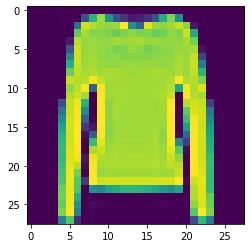

In [ ]:
## Visualize the data
import matplotlib.pyplot as plt
import random

# Define labels. Got it from: https://keras.io/api/datasets/fashion_mnist/
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover", "Dress",     "Coat",     "Sandal",       "Shirt",       "Sneaker",      "Bag",          "Ankle boot"]   
# Generate an image from index to check
img_index = random.randint(1, 59999)
# y_train = the labels
label_index = y_train[img_index]
# print label
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# show pic
plt.imshow(X_train[img_index])

In [ ]:
## Normalize data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
## Data preparation
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)


In [ ]:
## Model building

## complex model
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
## Simple model

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model1.add(tf.keras.layers.Dense(units = 10, activation = 'sigmoid'))
model1.summary()

#simple model 1 compile
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 16)                802832    
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
Total params: 803,322
Trainable params: 803,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train with the simpler model
from keras.callbacks import ModelCheckpoint
model1.fit(X_train,
         y_train,
         batch_size=64,
         epochs=7,
         validation_data=(X_valid, y_valid))

Epoch 1/7
860/860 [==============================] - 31s 35ms/step - loss: 0.6024 - accuracy: 0.7957 - val_loss: 0.3940 - val_accuracy: 0.8694
Epoch 2/7
860/860 [==============================] - 32s 37ms/step - loss: 0.3477 - accuracy: 0.8772 - val_loss: 0.3316 - val_accuracy: 0.8876
Epoch 3/7
860/860 [==============================] - 30s 35ms/step - loss: 0.3010 - accuracy: 0.8929 - val_loss: 0.3124 - val_accuracy: 0.8890
Epoch 4/7
860/860 [==============================] - 30s 35ms/step - loss: 0.2720 - accuracy: 0.9029 - val_loss: 0.3015 - val_accuracy: 0.8960
Epoch 5/7
860/860 [==============================] - 31s 36ms/step - loss: 0.2505 - accuracy: 0.9105 - val_loss: 0.3080 - val_accuracy: 0.8968
Epoch 6/7
860/860 [==============================] - 30s 35ms/step - loss: 0.2338 - accuracy: 0.9163 - val_loss: 0.3050 - val_accuracy: 0.8904
Epoch 7/7
860/860 [==============================] - 30s 35ms/step - loss: 0.2197 - accuracy: 0.9210 - val_loss: 0.2948 - val_accuracy: 0.8958

In [ ]:
## Complex Model compilation
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
## Complex Model training

model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=7,
         validation_data=(X_valid, y_valid))

Epoch 1/7
860/860 [==============================] - 76s 88ms/step - loss: 0.4511 - accuracy: 0.8373 - val_loss: 0.3217 - val_accuracy: 0.8880
Epoch 2/7
860/860 [==============================] - 75s 88ms/step - loss: 0.3100 - accuracy: 0.8867 - val_loss: 0.2711 - val_accuracy: 0.9004
Epoch 3/7
860/860 [==============================] - 74s 86ms/step - loss: 0.2608 - accuracy: 0.9028 - val_loss: 0.2414 - val_accuracy: 0.9118
Epoch 4/7
860/860 [==============================] - 75s 87ms/step - loss: 0.2288 - accuracy: 0.9148 - val_loss: 0.2417 - val_accuracy: 0.9130
Epoch 5/7
860/860 [==============================] - 75s 87ms/step - loss: 0.2024 - accuracy: 0.9245 - val_loss: 0.2239 - val_accuracy: 0.9172
Epoch 6/7
860/860 [==============================] - 75s 87ms/step - loss: 0.1820 - accuracy: 0.9316 - val_loss: 0.2210 - val_accuracy: 0.9196
Epoch 7/7
860/860 [==============================] - 75s 87ms/step - loss: 0.1622 - accuracy: 0.9394 - val_loss: 0.2146 - val_accuracy: 0.9212

In [ ]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
score1 = model1.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'test accurate score of complex model:', score[1])
print('\n', 'test accurate score of simple model:', score1[1])

#Result seems pretty similar. I don't think we need a complex model for a problem like this.
#simple model seems to be able to produce similar result(2% accuracy diff). This beg the question, is the 2% diff worth the extra effort and computing power for a complex model?


 test accurate score of complex model: 0.9172000288963318

 test accurate score of simple model: 0.886900007724762


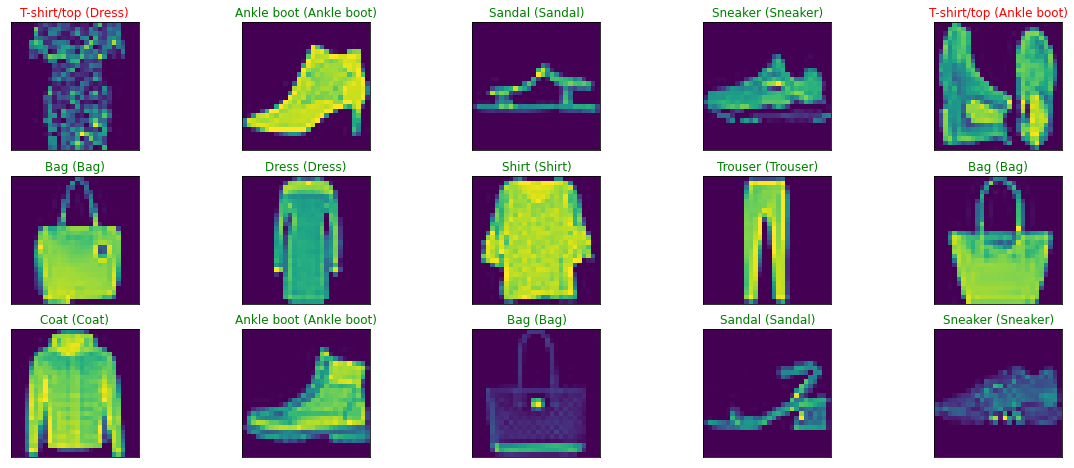

In [ ]:
## visualize it using the best model, the complex version
import numpy as np

y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
    
  
